In [2]:
import os
import sys
import numpy as np
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt

In [38]:
year = 2017
mcs_dir = Path('/scratch/wmtsai/featenv_analysis/dataset/MCS_FLEXTRKR_tropics/{}'.format(year))
mcstrack_dir = mcs_dir / 'feature_catalogs/track'
mcsenv_dir = mcs_dir / 'environment_catalogs/VARS_3D'

nonmcs_dir = Path('/scratch/wmtsai/featenv_analysis/dataset/NonMCS_FLEXTRKR_tropics/{}'.format(year))
nonmcstrack_dir = nonmcs_dir / 'feature_catalogs/track'
nonmcsenv_dir = nonmcs_dir / 'environment_catalogs/VARS_3D'

In [19]:
file = list(mcstrack_dir.glob('*.nc'))[0]
track_mcs = xr.open_dataset(file)
env_mcs = xr.open_dataset(mcsenv_dir / 'MCS_FLEXTRKR_tropics_T.merged.nc')
file = list(nonmcstrack_dir.glob('*.nc'))[0]
track_nonmcs = xr.open_dataset(file)
env_nonmcs = xr.open_dataset(nonmcsenv_dir / 'NonMCS_FLEXTRKR_tropics_T.merged.nc')

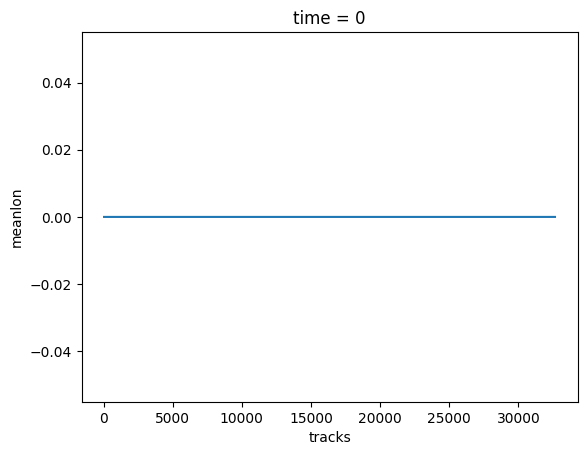

In [46]:
test1 = track_mcs.sel(time=0).meanlon
test2 = test1.where(test1 >=0, test1 + 360)
(test2-test1).plot()

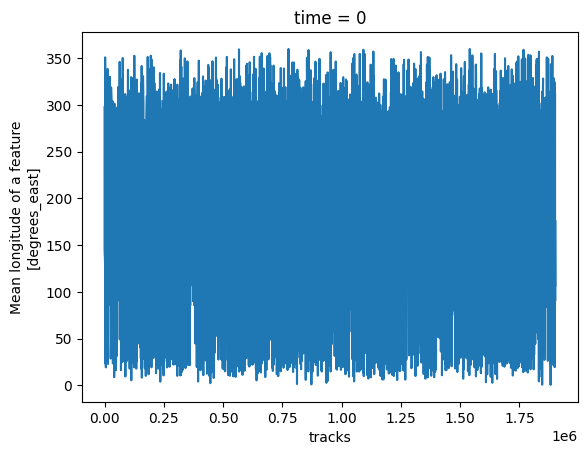

In [48]:
test = track_nonmcs.sel(time=0).meanlon
test1 = test.where(test >=0, test + 360)
test1.plot()

In [44]:
test.min()

<xarray.DataArray 'meanlon' ()> Size: 8B
array(0.61363637)
Coordinates:
    time     int64 8B 0

In [7]:
### checking environment outputs
env_mcs.sel(time=0)

<xarray.Dataset> Size: 6GB
Dimensions:    (tracks: 5195, time: 6, level: 27, y: 41, x: 41)
Coordinates:
  * level      (level) int32 108B 100 125 150 175 200 ... 900 925 950 975 1000
    lon        (tracks, time, x) float64 10MB ...
    lat        (tracks, time, y) float64 10MB ...
  * x          (x) int64 328B 0 1 2 3 4 5 6 7 8 9 ... 32 33 34 35 36 37 38 39 40
  * y          (y) int64 328B 0 1 2 3 4 5 6 7 8 9 ... 32 33 34 35 36 37 38 39 40
  * time       (time) int64 48B 0 1 2 3 4 5
  * tracks     (tracks) int64 42kB 38 47 57 63 67 ... 32603 32622 32634 32649
Data variables:
    t          (tracks, time, level, y, x) float32 6GB ...
    base_time  (tracks, time) datetime64[ns] 249kB ...
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [20]:
env_mcs.t

<xarray.DataArray 't' (tracks: 5195, time: 6, level: 27, y: 41, x: 41)> Size: 6GB
[1414712790 values with dtype=float32]
Coordinates:
  * level    (level) int32 108B 100 125 150 175 200 225 ... 900 925 950 975 1000
    lon      (tracks, time, x) float64 10MB ...
    lat      (tracks, time, y) float64 10MB ...
  * x        (x) int64 328B 0 1 2 3 4 5 6 7 8 9 ... 32 33 34 35 36 37 38 39 40
  * y        (y) int64 328B 0 1 2 3 4 5 6 7 8 9 ... 32 33 34 35 36 37 38 39 40
  * time     (time) int64 48B 0 1 2 3 4 5
  * tracks   (tracks) int64 42kB 38 47 57 63 67 ... 32603 32622 32634 32649
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [31]:
test = env_nonmcs.transpose("tracks","time","level","y","x")

In [32]:
test

<xarray.Dataset> Size: 5GB
Dimensions:    (tracks: 5000, time: 5, y: 41, x: 41, level: 27)
Coordinates:
  * y          (y) int64 328B 0 1 2 3 4 5 6 7 8 9 ... 32 33 34 35 36 37 38 39 40
  * x          (x) int64 328B 0 1 2 3 4 5 6 7 8 9 ... 32 33 34 35 36 37 38 39 40
  * time       (time) int64 40B 0 1 2 3 4
    lon        (time, x) float64 2kB ...
    lat        (time, y, x) float64 67kB ...
  * tracks     (tracks) int64 40kB 121 215 2556 2561 ... 1900860 1901188 1902330
  * level      (level) int32 108B 100 125 150 175 200 ... 900 925 950 975 1000
Data variables:
    t          (tracks, time, level, y, x) float32 5GB nan nan ... 299.2 299.1
    base_time  (tracks, time) datetime64[ns] 200kB ...

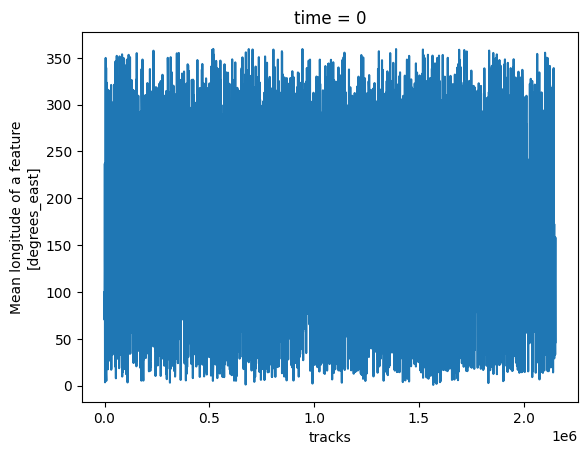

In [51]:
ds = xr.open_dataset('/scratch/wmtsai/featenv_analysis/dataset/NonMCS_FLEXTRKR_tropics/2018/feature_catalogs/track/track_geoinfo.nc')
ds.meanlon.sel(time=0).plot()